In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('train.csv', engine='python')
df

,Id,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,required_doughnuts_comsumption,fraudulent
0,0,5737,Jr. Business Analyst & Quality Analyst (entry...,"US, NJ, PISCATAWAY",NaN,NaN,NaN,"Duration: Full time / W2Location: Piscataway,N...",What we require:-- Masters degree in Computers...,NaN,0,0,0,Full-time,Entry level,Master's Degree,Financial Services,Finance,-0.410911,0
1,1,7107,English Teacher Abroad,"US, PA, Scranton",NaN,NaN,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for itÂ Love travel? ...",University degree required.Â TEFL / TESOL / CE...,See job description,0,1,1,Contract,NaN,Bachelor's Degree,Education Management,NaN,-0.163785,0
2,2,11979,SQL Server Database Developer Job opportunity ...,"US, IL, Barrington",NaN,90000-100000,We are an innovative personnel-sourcing firm w...,Position : SQL Server Database DeveloperJob Lo...,Position : SQL Server Database DeveloperJob Lo...,Benefits - FullBonus Eligible - Yes,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,-0.244369,0
3,3,9375,Legal Analyst - 12 Month FTC,"GB, LND, London",Legal,NaN,MarketInvoice is one of the most high-profile ...,DescriptionOur mission at MarketInvoice is to ...,Duties and ResponsibilitiesReviewing contractu...,Competitive salaryPrivate HealthcareHalf price...,0,1,0,Full-time,Associate,Professional,Financial Services,Legal,-0.456807,0
4,4,1301,Part-Time Finance Assistant,"GB, LND,",NaN,NaN,NaN,Salary:Â£9 - Â£10 per hourÂ We are currently g...,"Your role will be a varied, interesting and in...",Salary:Â£9 - Â£10 per hourÂ,0,0,0,Part-time,NaN,NaN,Accounting,NaN,-0.217880,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10723,10723,11225,Production Artist,"US, TX, Austin",Design,NaN,"We're an emerging technology agency, and we bu...",Your hand develops our complete digital visual...,Requirements/Qualifications:1+ years of intera...,Why work for Mutual Mobile? We craft beautiful...,0,1,1,Full-time,Associate,Bachelor's Degree,Computer Software,Design,0.208937,0
10724,10724,7567,iOS Developer,"US, , New York",NaN,NaN,BlueLine Grid is transforming government commu...,BlueLine Grid is transforming government commu...,"BS/MS degree in Computer Science, Engineering ...","Full health, vision, dental benefitsNo vacatio...",0,1,0,Full-time,Mid-Senior level,Unspecified,NaN,Information Technology,-0.089956,0
10725,10725,9098,Graduates: English Teacher Abroad,"US, CA, Fremont",NaN,NaN,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it :-)Love travel...",University degree required.Â TEFL / TESOL / CE...,See job description,0,1,0,Contract,NaN,Bachelor's Degree,Education Management,NaN,0.335414,0
10726,10726,4821,Senior IT Security Lead (SIEM / IDS),"US, CO, Colorado Springs",NaN,NaN,Roland &amp; Associates is a Corporate Recruit...,You will own the development of operational pl...,Job Role :Â Â Senior IT Security Lead (SIEM / ...,Salary: Excellent package with full benefits a...,0,1,0,Full-time,Mid-Senior level,Associate Degree,Electrical/Electronic Manufacturing,Information Technology,-0.262851,0


In [2]:
train_df = df[['employment_type', 'required_experience', 'required_education', 'industry', 'function', 'fraudulent']]
train_df

,employment_type,required_experience,required_education,industry,function,fraudulent
0,Full-time,Entry level,Master's Degree,Financial Services,Finance,0
1,Contract,NaN,Bachelor's Degree,Education Management,NaN,0
2,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0
3,Full-time,Associate,Professional,Financial Services,Legal,0
4,Part-time,NaN,NaN,Accounting,NaN,0
...,...,...,...,...,...,...
10723,Full-time,Associate,Bachelor's Degree,Computer Software,Design,0
10724,Full-time,Mid-Senior level,Unspecified,NaN,Information Technology,0
10725,Contract,NaN,Bachelor's Degree,Education Management,NaN,0
10726,Full-time,Mid-Senior level,Associate Degree,Electrical/Electronic Manufacturing,Information Technology,0


In [3]:
threshold = train_df.groupby('fraudulent').size()[1] / train_df.groupby('fraudulent').size()[0]
threshold

0.04827047097908931

In [4]:
train_df['employment_type'].describe()

count          8670
unique            5
top       Full-time
freq           6992
Name: employment_type, dtype: object

In [5]:
train_df['employment_type'].unique()

array(['Full-time', 'Contract', 'Part-time', nan, 'Other', 'Temporary'],
      dtype=object)

In [6]:
train_df.groupby(['fraudulent', 'employment_type']).size()

fraudulent  employment_type
0           Contract            872
            Full-time          6712
            Other               132
            Part-time           439
            Temporary           151
1           Contract             30
            Full-time           280
            Other                 8
            Part-time            44
            Temporary             2
dtype: int64

In [7]:
employment_type_df = train_df.groupby(['employment_type']).apply(lambda x: x['fraudulent'].sum()/len(x))

employment_nulls = train_df[pd.isnull(train_df.employment_type)].groupby(['fraudulent']).size()
employment_type_df['NaN'] = employment_nulls[1] / employment_nulls[0]

employment_type_df

employment_type
Contract     0.033259
Full-time    0.040046
Other        0.057143
Part-time    0.091097
Temporary    0.013072
NaN          0.067427
dtype: float64

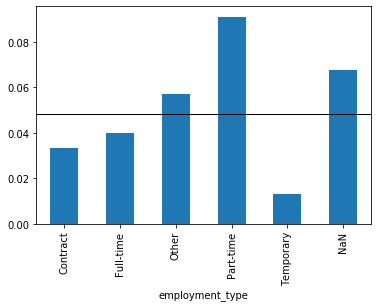

In [8]:
employment_type_df.plot.bar()
plt.axhline(y=threshold,linewidth=1, color='k')

In [9]:
train_df['required_experience'].describe()

count                 6489
unique                   7
top       Mid-Senior level
freq                  2263
Name: required_experience, dtype: object

In [10]:
train_df['required_experience'].unique()

array(['Entry level', nan, 'Mid-Senior level', 'Associate',
       'Not Applicable', 'Executive', 'Director', 'Internship'],
      dtype=object)

In [11]:
train_df.groupby(['fraudulent', 'required_experience']).size()

fraudulent  required_experience
0           Associate              1339
            Director                222
            Entry level            1538
            Executive                76
            Internship              220
            Mid-Senior level       2198
            Not Applicable          649
1           Associate                22
            Director                 12
            Entry level             101
            Executive                 8
            Internship                6
            Mid-Senior level         65
            Not Applicable           33
dtype: int64

In [12]:
required_experience_df = train_df.groupby(['required_experience']).apply(lambda x: x['fraudulent'].sum()/len(x))

required_experience_nulls = train_df[pd.isnull(train_df.required_experience)].groupby(['fraudulent']).size()
required_experience_df['NaN'] = required_experience_nulls[1] / required_experience_nulls[0]

required_experience_df

required_experience
Associate           0.016165
Director            0.051282
Entry level         0.061623
Executive           0.095238
Internship          0.026549
Mid-Senior level    0.028723
Not Applicable      0.048387
NaN                 0.061874
dtype: float64

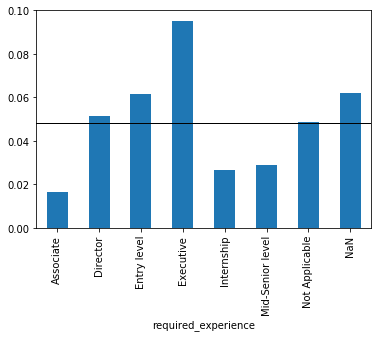

In [13]:
required_experience_df.plot.bar()
plt.axhline(y=threshold,linewidth=1, color='k')

In [14]:
train_df['required_education'].describe()


count                  5827
unique                   13
top       Bachelor's Degree
freq                   3058
Name: required_education, dtype: object

In [15]:
train_df['required_education'].unique()

array(["Master's Degree", "Bachelor's Degree", 'Professional', nan,
       'High School or equivalent', 'Unspecified',
       'Some College Coursework Completed', 'Associate Degree',
       'Vocational', 'Certification', 'Some High School Coursework',
       'Vocational - Degree', 'Doctorate', 'Vocational - HS Diploma'],
      dtype=object)

In [16]:
train_df.groupby(['fraudulent', 'required_education']).size()

fraudulent  required_education               
0           Associate Degree                      166
            Bachelor's Degree                    3005
            Certification                         106
            Doctorate                              15
            High School or equivalent            1156
            Master's Degree                       227
            Professional                           42
            Some College Coursework Completed      49
            Some High School Coursework             3
            Unspecified                           784
            Vocational                             28
            Vocational - Degree                     3
            Vocational - HS Diploma                 6
1           Associate Degree                        6
            Bachelor's Degree                      53
            Certification                           8
            High School or equivalent             100
            Master's Degree         

In [17]:
required_education_df = train_df.groupby(['required_education']).apply(lambda x: x['fraudulent'].sum()/len(x))

required_education_nulls = train_df[pd.isnull(train_df.required_education)].groupby(['fraudulent']).size()
required_education_df['NaN'] = required_education_nulls[1] / required_education_nulls[0]

required_education_df

required_education
Associate Degree                     0.034884
Bachelor's Degree                    0.017332
Certification                        0.070175
Doctorate                            0.000000
High School or equivalent            0.079618
Master's Degree                      0.077236
Professional                         0.045455
Some College Coursework Completed    0.039216
Some High School Coursework          0.769231
Unspecified                          0.045067
Vocational                           0.000000
Vocational - Degree                  0.000000
Vocational - HS Diploma              0.000000
NaN                                  0.055340
dtype: float64

We can see that 'Some High School Coursework' has a lot of frauds.

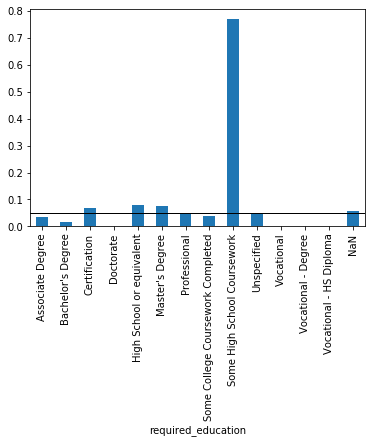

In [18]:
required_education_df.plot.bar()
plt.axhline(y=threshold,linewidth=1, color='k')

Vocational ones can be grouped since all the same ratio of frauds (0).

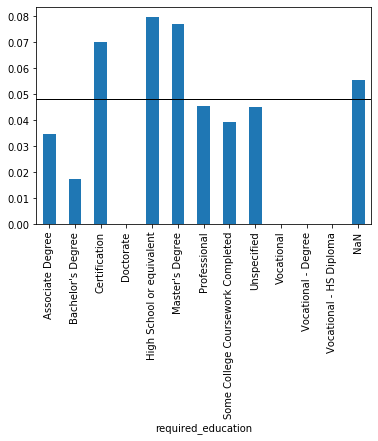

In [19]:
required_education_df[required_education_df < 0.1].plot.bar()
plt.axhline(y=threshold,linewidth=1, color='k')

In [20]:
train_df['industry'].describe()

count                                    7789
unique                                    127
top       Information Technology and Services
freq                                     1017
Name: industry, dtype: object

In [21]:
train_df['industry'].unique()

array(['Financial Services', 'Education Management',
       'Information Technology and Services', 'Accounting',
       'Computer Software', nan, 'Legal Services', 'Consumer Services',
       'Internet', 'Insurance', 'Telecommunications',
       'Industrial Automation', 'Nonprofit Organization Management',
       'Banking', 'Market Research', 'Oil & Energy',
       'Computer & Network Security', 'Automotive',
       'Health, Wellness and Fitness', 'Logistics and Supply Chain',
       'Real Estate', 'Electrical/Electronic Manufacturing',
       'Marketing and Advertising', 'Management Consulting',
       'Motion Pictures and Film', 'Food Production',
       'Building Materials', 'Professional Training & Coaching',
       'Cosmetics', 'Airlines/Aviation', 'Retail', 'Furniture',
       'Apparel & Fashion', 'Hospitality', 'Consumer Electronics',
       'E-Learning', 'Hospital & Health Care', 'Online Media',
       'Aviation & Aerospace', 'Transportation/Trucking/Railroad',
       'Publishi

We have to group the least frequent ones. Maybe do the cut at 30+ rows size

In [22]:
industry_size_df = train_df.groupby(['industry']).size().sort_values(ascending=False)
industry_top_df = industry_size_df[industry_size_df >= 30]
industry_top_df

industry
Information Technology and Services    1017
Computer Software                       837
Internet                                622
Marketing and Advertising               515
Education Management                    491
Financial Services                      462
Hospital & Health Care                  289
Consumer Services                       202
Telecommunications                      201
Oil & Energy                            174
Retail                                  131
Real Estate                             117
Accounting                               97
Construction                             92
E-Learning                               90
Management Consulting                    81
Insurance                                80
Automotive                               79
Health, Wellness and Fitness             79
Staffing and Recruiting                  76
Design                                   70
Apparel & Fashion                        67
Logistics and Supply Ch

In [23]:
industry_df = train_df[train_df.industry.isin(industry_top_df.index)].groupby(['industry']).apply(lambda x: x['fraudulent'].sum()/len(x))
industry_df = industry_df[(industry_df >= 0.1) | (industry_df <= 0.02)]

industry_nulls = train_df[pd.isnull(train_df.industry)].groupby(['fraudulent']).size()
industry_df['NaN'] = industry_nulls[1] / industry_nulls[0]

industry_df

industry
Accounting                           0.371134
Airlines/Aviation                    0.000000
Banking                              0.000000
Broadcast Media                      0.000000
Computer Games                       0.000000
Computer Software                    0.001195
Consumer Electronics                 0.000000
Cosmetics                            0.000000
Design                               0.014286
E-Learning                           0.011111
Education Management                 0.000000
Food & Beverages                     0.000000
Health, Wellness and Fitness         0.113924
Hospitality                          0.181818
Internet                             0.000000
Legal Services                       0.000000
Leisure, Travel & Tourism            0.315789
Logistics and Supply Chain           0.000000
Nonprofit Organization Management    0.000000
Oil & Energy                         0.385057
Online Media                         0.000000
Real Estate              

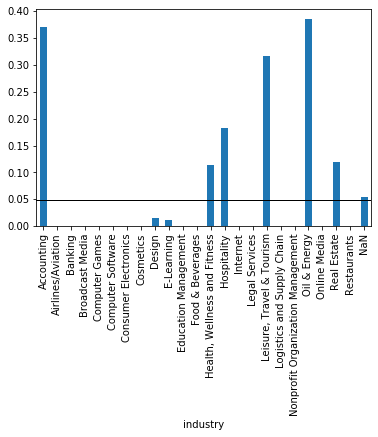

In [24]:
industry_df.plot.bar()
plt.axhline(y=threshold,linewidth=1, color='k')

These are the categories that passed the cut and are far apart from the threshold. Accounting, Hospitality and Oil & Energy have a big ratio of frauds and they have (97, 55, 174) records.

Further groupping investigation should be done in case we use this feature.

In [25]:
train_df['function'].describe()

count                       6858
unique                        37
top       Information Technology
freq                        1087
Name: function, dtype: object

In [26]:
train_df['function'].unique()

array(['Finance', nan, 'Information Technology', 'Legal', 'Sales',
       'Customer Service', 'Accounting/Auditing', 'Engineering', 'Design',
       'Business Development', 'Marketing', 'Product Management',
       'Project Management', 'Art/Creative', 'Data Analyst', 'Other',
       'Consulting', 'Human Resources', 'Education', 'Public Relations',
       'Health Care Provider', 'Writing/Editing', 'Advertising',
       'Production', 'Management', 'Strategy/Planning', 'Supply Chain',
       'Business Analyst', 'Financial Analyst', 'Distribution',
       'Administrative', 'Manufacturing', 'Quality Assurance', 'Research',
       'General Business', 'Training', 'Purchasing', 'Science'],
      dtype=object)

In [27]:
train_df.groupby(['fraudulent', 'function']).size()

fraudulent  function              
0           Accounting/Auditing        116
            Administrative             320
            Advertising                 53
            Art/Creative                82
            Business Analyst            51
            Business Development       115
            Consulting                  82
            Customer Service           719
            Data Analyst                46
            Design                     200
            Distribution                16
            Education                  194
            Engineering                723
            Finance                     88
            Financial Analyst           13
            General Business            39
            Health Care Provider       212
            Human Resources            120
            Information Technology    1067
            Legal                       24
            Management                 192
            Manufacturing               46
            Marketi

In [28]:
function_size_df = train_df.groupby(['function']).size().sort_values(ascending=False)
function_top_df = function_size_df[function_size_df >= 30]
function_top_df

function
Information Technology    1087
Sales                      878
Engineering                795
Customer Service           753
Marketing                  477
Administrative             384
Health Care Provider       212
Design                     201
Management                 197
Education                  194
Other                      193
Accounting/Auditing        137
Human Resources            125
Business Development       122
Project Management         104
Finance                     98
Consulting                  85
Art/Creative                82
Writing/Editing             73
Production                  72
Product Management          69
Quality Assurance           62
Advertising                 55
Business Analyst            52
Data Analyst                49
Manufacturing               47
Public Relations            40
General Business            39
Research                    32
dtype: int64

In [29]:
function_df = train_df[train_df.function.isin(function_top_df.index)].groupby(['function']).apply(lambda x: x['fraudulent'].sum()/len(x))
function_df = function_df[(function_df >= 0.1) | (function_df <= 0.02)]

function_nulls = train_df[pd.isnull(train_df.function)].groupby(['fraudulent']).size()
function_df['NaN'] = function_nulls[1] / function_nulls[0]

function_df

function
Accounting/Auditing       0.153285
Administrative            0.166667
Art/Creative              0.000000
Business Analyst          0.019231
Design                    0.004975
Education                 0.000000
Finance                   0.102041
General Business          0.000000
Health Care Provider      0.000000
Information Technology    0.018399
Marketing                 0.016771
Product Management        0.000000
Production                0.000000
Quality Assurance         0.000000
Research                  0.000000
Writing/Editing           0.000000
NaN                       0.051345
dtype: float64

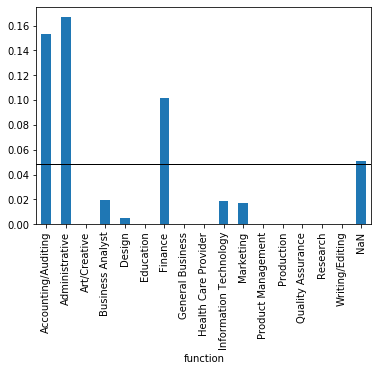

In [30]:
function_df.plot.bar()
plt.axhline(y=threshold,linewidth=1, color='k')

Here starts the cleaning.

In [31]:
train_df['employment_type'].unique()

array(['Full-time', 'Contract', 'Part-time', nan, 'Other', 'Temporary'],
      dtype=object)

In [32]:
train_df['Contract_employment'] = np.where(train_df['employment_type'] == 'Contract', 1, 0)
train_df['Full-time_employment'] = np.where(train_df['employment_type'] == 'Full-time', 1, 0)
train_df['Part-time_employment'] = np.where(train_df['employment_type'] == 'Part-time', 1, 0)
train_df['Temporary_employment'] = np.where(train_df['employment_type'] == 'Temporary', 1, 0)
train_df['Other_employment_type'] = np.where(~train_df['employment_type'].isin(['Contract', 'Full-time', 'Part-time', 'Temporary']), 1, 0)
train_df = train_df.drop(labels='employment_type', axis=1)
train_df

C:\Users\Dario\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dario\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Dario\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,required_experience,required_education,industry,function,fraudulent,Contract_employment,Full-time_employment,Part-time_employment,Temporary_employment,Other_employment_type
0,Entry level,Master's Degree,Financial Services,Finance,0,0,1,0,0,0
1,NaN,Bachelor's Degree,Education Management,NaN,0,1,0,0,0,0
2,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0,0,1,0,0,0
3,Associate,Professional,Financial Services,Legal,0,0,1,0,0,0
4,NaN,NaN,Accounting,NaN,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
10723,Associate,Bachelor's Degree,Computer Software,Design,0,0,1,0,0,0
10724,Mid-Senior level,Unspecified,NaN,Information Technology,0,0,1,0,0,0
10725,NaN,Bachelor's Degree,Education Management,NaN,0,1,0,0,0,0
10726,Mid-Senior level,Associate Degree,Electrical/Electronic Manufacturing,Information Technology,0,0,1,0,0,0


In [33]:
train_df['required_experience'].unique()

array(['Entry level', nan, 'Mid-Senior level', 'Associate',
       'Not Applicable', 'Executive', 'Director', 'Internship'],
      dtype=object)

In [34]:
train_df['Associate_experience'] = np.where(train_df['required_experience'] == 'Associate', 1, 0)
train_df['Director_experience'] = np.where(train_df['required_experience'] == 'Director', 1, 0)
train_df['Entry_level_experience'] = np.where(train_df['required_experience'] == 'Entry level', 1, 0)
train_df['Executive_experience'] = np.where(train_df['required_experience'] == 'Executive', 1, 0)
train_df['Internship_experience'] = np.where(train_df['required_experience'] == 'Internship', 1, 0)
train_df['Mid-Senior_level_experience'] = np.where(train_df['required_experience'] == 'Mid-Senior level', 1, 0)
train_df['Not_Applicable_experience'] = np.where(~train_df['required_experience'].isin(['Associate', 'Director', 'Entry level', 'Executive', 'Internship', 'Mid-Senior level']), 1, 0)
train_df = train_df.drop(labels='required_experience', axis=1)
train_df

,required_education,industry,function,fraudulent,Contract_employment,Full-time_employment,Part-time_employment,Temporary_employment,Other_employment_type,Associate_experience,Director_experience,Entry_level_experience,Executive_experience,Internship_experience,Mid-Senior_level_experience,Not_Applicable_experience
0,Master's Degree,Financial Services,Finance,0,0,1,0,0,0,0,0,1,0,0,0,0
1,Bachelor's Degree,Education Management,NaN,0,1,0,0,0,0,0,0,0,0,0,0,1
2,Bachelor's Degree,Information Technology and Services,Information Technology,0,0,1,0,0,0,0,0,0,0,0,1,0
3,Professional,Financial Services,Legal,0,0,1,0,0,0,1,0,0,0,0,0,0
4,NaN,Accounting,NaN,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10723,Bachelor's Degree,Computer Software,Design,0,0,1,0,0,0,1,0,0,0,0,0,0
10724,Unspecified,NaN,Information Technology,0,0,1,0,0,0,0,0,0,0,0,1,0
10725,Bachelor's Degree,Education Management,NaN,0,1,0,0,0,0,0,0,0,0,0,0,1
10726,Associate Degree,Electrical/Electronic Manufacturing,Information Technology,0,0,1,0,0,0,0,0,0,0,0,1,0


In [35]:
train_df['required_education'].unique()

array(["Master's Degree", "Bachelor's Degree", 'Professional', nan,
       'High School or equivalent', 'Unspecified',
       'Some College Coursework Completed', 'Associate Degree',
       'Vocational', 'Certification', 'Some High School Coursework',
       'Vocational - Degree', 'Doctorate', 'Vocational - HS Diploma'],
      dtype=object)

In [36]:
train_df['Associate_Degree_education'] = np.where(train_df['required_education'] == 'Associate Degree', 1, 0)
train_df["Bachelor's_Degree_education"] = np.where(train_df['required_education'] == "Bachelor's Degree", 1, 0)
train_df['Certification_education'] = np.where(train_df['required_education'] == 'Certification', 1, 0)
train_df['College_Coursework_education'] = np.where(train_df['required_education'] == 'Some College Coursework Completed', 1, 0)
train_df['Doctorate_education'] = np.where(train_df['required_education'] == 'Doctorate', 1, 0)
train_df['High_School_education'] = np.where(train_df['required_education'] == 'High School or equivalent', 1, 0)
train_df['High_School_Coursework_education'] = np.where(train_df['required_education'] == 'Some High School Coursework', 1, 0)
train_df["Master's_Degree_education"] = np.where(train_df['required_education'] == "Master's Degree", 1, 0)
train_df['Professional_education'] = np.where(train_df['required_education'] == 'Professional', 1, 0)
train_df['Vocational_education'] = np.where(train_df['required_education'].isin(['Vocational', 'Vocational - Degree', 'Vocational - HS Diploma']), 1, 0)
train_df['Unspecified_education'] = np.where(~train_df['required_education'].isin(['Associate Degree', "Bachelor's Degree", 'Certification', 'Some College Coursework Completed',
        'Doctorate', 'High School or equivalent', 'Some High School Coursework', "Master's Degree", 'Professional', 'Vocational', 'Vocational - Degree', 'Vocational - HS Diploma']), 1, 0)
train_df = train_df.drop(labels='required_education', axis=1)
train_df

,industry,function,fraudulent,Contract_employment,Full-time_employment,Part-time_employment,Temporary_employment,Other_employment_type,Associate_experience,Director_experience,...,Bachelor's_Degree_education,Certification_education,College_Coursework_education,Doctorate_education,High_School_education,High_School_Coursework_education,Master's_Degree_education,Professional_education,Vocational_education,Unspecified_education
0,Financial Services,Finance,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,Education Management,NaN,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,Information Technology and Services,Information Technology,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Financial Services,Legal,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,Accounting,NaN,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10723,Computer Software,Design,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
10724,NaN,Information Technology,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10725,Education Management,NaN,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
10726,Electrical/Electronic Manufacturing,Information Technology,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
train_df['Accounting_industry'] = np.where(train_df['industry'] == 'Accounting', 1, 0)
train_df['Airlines/Aviation_industry'] = np.where(train_df['industry'] == 'Airlines/Aviation', 1, 0)
train_df['Banking_industry'] = np.where(train_df['industry'] == 'Banking', 1, 0)
train_df['Broadcast_Media_industry'] = np.where(train_df['industry'] == 'Broadcast Media', 1, 0)
train_df['Computer_Games_and_Software_industry'] = np.where(train_df['industry'].isin(['Computer Games', 'Computer Software']), 1, 0)
train_df['Consumer_Electronics_industry'] = np.where(train_df['industry'] == 'Consumer Electronics', 1., 0.)
train_df['Cosmetics_industry'] = np.where(train_df['industry'] == 'Cosmetics', 1, 0)
train_df['Design_industry'] = np.where(train_df['industry'] == 'Design', 1, 0)
train_df['E-Learning_industry'] = np.where(train_df['industry'] == 'E-Learning', 1, 0)
train_df['Education_Management_industry'] = np.where(train_df['industry'] == 'Education Management', 1, 0)
train_df['Food_&_Beverages_industry'] = np.where(train_df['industry'] == 'Food & Beverages', 1, 0)
train_df['Health_Wellness_and_Fitness_industry'] = np.where(train_df['industry'] == 'Health, Wellness and Fitness', 1, 0)
train_df['Hospitality_industry'] = np.where(train_df['industry'] == 'Hospitality', 1, 0)
train_df['Internet_industry'] = np.where(train_df['industry'] == 'Internet', 1, 0)
train_df['Legal_Services_industry'] = np.where(train_df['industry'] == 'Legal Services', 1, 0)
train_df['Leisure_Travel_&_Tourism_industry'] = np.where(train_df['industry'] == 'Leisure, Travel & Tourism', 1, 0)
train_df['Logistics_and_Supply Chain_industry'] = np.where(train_df['industry'] == 'Logistics and Supply Chain', 1, 0)
train_df['Nonprofit_Organization_Management_industry'] = np.where(train_df['industry'] == 'Nonprofit Organization Management', 1, 0)
train_df['Oil_&_Energy_industry'] = np.where(train_df['industry'] == 'Oil & Energy', 1, 0)
train_df['Online_Media_industry'] = np.where(train_df['industry'] == 'Online Media', 1, 0)
train_df['Real_Estate_industry'] = np.where(train_df['industry'] == 'Real Estate', 1, 0)
train_df['Restaurants_industry'] = np.where(train_df['industry'] == 'Restaurants', 1, 0)
train_df['Other_industry'] = np.where(~train_df['industry'].isin(['Accounting', 'Airlines/Aviation', 'Banking', 'Broadcast Media', 'Computer Games', 'Computer Software', 'Consumer Electronics', 'Cosmetics',
        'Design', 'E-Learning', 'Education Management', 'Food & Beverages', 'Health, Wellness and Fitness', 'Hospitality', 'Internet', 'Legal Services', 'Leisure, Travel & Tourism', 'Logistics and Supply Chain',
        'Nonprofit Organization Management', 'Oil & Energy', 'Online Media', 'Real Estate', 'Restaurants']), 1, 0)
train_df = train_df.drop(labels='industry', axis=1)
train_df

,function,fraudulent,Contract_employment,Full-time_employment,Part-time_employment,Temporary_employment,Other_employment_type,Associate_experience,Director_experience,Entry_level_experience,...,Internet_industry,Legal_Services_industry,Leisure_Travel_&_Tourism_industry,Logistics_and_Supply Chain_industry,Nonprofit_Organization_Management_industry,Oil_&_Energy_industry,Online_Media_industry,Real_Estate_industry,Restaurants_industry,Other_industry
0,Finance,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,NaN,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Information Technology,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Legal,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,NaN,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10723,Design,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10724,Information Technology,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10725,NaN,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10726,Information Technology,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [38]:
train_df['Accounting/Auditing_function'] = np.where(train_df['function'] == 'Accounting/Auditing', 1, 0)
train_df['Administrative_function'] = np.where(train_df['function'] == 'Administrative', 1, 0)
train_df['Art/Creative_function'] = np.where(train_df['function'] == 'Art/Creative', 1, 0)
train_df['Business_Analyst_function'] = np.where(train_df['function'] == 'Business Analyst', 1, 0)
train_df['Design_function'] = np.where(train_df['function'] == 'Design', 1, 0)
train_df['Education_function'] = np.where(train_df['function'] == 'Education', 1, 0)
train_df['Finance_function'] = np.where(train_df['function'] == 'Finance', 1, 0)
train_df['General_Business_function'] = np.where(train_df['function'] == 'General Business', 1, 0)
train_df['Health_Care_Provider_function'] = np.where(train_df['function'] == 'Health Care Provider', 1, 0)
train_df['Information_Technology_function'] = np.where(train_df['function'] == 'Information Technology', 1, 0)
train_df['Marketing_function'] = np.where(train_df['function'] == 'Marketing', 1, 0)
train_df['Product_Management_function'] = np.where(train_df['function'] == 'Product Management', 1, 0)
train_df['Production_function'] = np.where(train_df['function'] == 'Production', 1, 0)
train_df['Quality_Assurance_function'] = np.where(train_df['function'] == 'Quality Assurance', 1, 0)
train_df['Research_function'] = np.where(train_df['function'] == 'Research', 1, 0)
train_df['Writing/Editing_function'] = np.where(train_df['function'] == 'Writing/Editing', 1, 0)
train_df['Other_function'] = np.where(~train_df['function'].isin(['Accounting/Auditing', 'Administrative', 'Art/Creative', 'Business Analyst', 'Design', 'Education', 'Finance',
        'General Business', 'Health Care Provider', 'Information Technology', 'Marketing', 'Product Management', 'Production', 'Quality Assurance', 'Research', 'Writing/Editing']), 1, 0)
train_df = train_df.drop(labels='function', axis=1)
train_df

,fraudulent,Contract_employment,Full-time_employment,Part-time_employment,Temporary_employment,Other_employment_type,Associate_experience,Director_experience,Entry_level_experience,Executive_experience,...,General_Business_function,Health_Care_Provider_function,Information_Technology_function,Marketing_function,Product_Management_function,Production_function,Quality_Assurance_function,Research_function,Writing/Editing_function,Other_function
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10723,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10724,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
10725,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10726,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [39]:
train_df = train_df.drop(labels='fraudulent', axis=1)
train_df

,Contract_employment,Full-time_employment,Part-time_employment,Temporary_employment,Other_employment_type,Associate_experience,Director_experience,Entry_level_experience,Executive_experience,Internship_experience,...,General_Business_function,Health_Care_Provider_function,Information_Technology_function,Marketing_function,Product_Management_function,Production_function,Quality_Assurance_function,Research_function,Writing/Editing_function,Other_function
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10723,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10724,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
10725,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10726,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [40]:
train_df.to_csv('dario_train1.csv')

In [41]:
df = pd.read_csv('test.csv', engine='python')

In [42]:
test_df = df[['employment_type', 'required_experience', 'required_education', 'industry', 'function']]

test_df['Contract_employment'] = np.where(test_df['employment_type'] == 'Contract', 1, 0)
test_df['Full-time_employment'] = np.where(test_df['employment_type'] == 'Full-time', 1, 0)
test_df['Part-time_employment'] = np.where(test_df['employment_type'] == 'Part-time', 1, 0)
test_df['Temporary_employment'] = np.where(test_df['employment_type'] == 'Temporary', 1, 0)
test_df['Other_employment_type'] = np.where(~test_df['employment_type'].isin(['Contract', 'Full-time', 'Part-time', 'Temporary']), 1, 0)
test_df = test_df.drop(labels='employment_type', axis=1)

test_df['Associate_experience'] = np.where(test_df['required_experience'] == 'Associate', 1, 0)
test_df['Director_experience'] = np.where(test_df['required_experience'] == 'Director', 1, 0)
test_df['Entry_level_experience'] = np.where(test_df['required_experience'] == 'Entry level', 1, 0)
test_df['Executive_experience'] = np.where(test_df['required_experience'] == 'Executive', 1, 0)
test_df['Internship_experience'] = np.where(test_df['required_experience'] == 'Internship', 1, 0)
test_df['Mid-Senior_level_experience'] = np.where(test_df['required_experience'] == 'Mid-Senior level', 1, 0)
test_df['Not_Applicable_experience'] = np.where(~test_df['required_experience'].isin(['Associate', 'Director', 'Entry level', 'Executive', 'Internship', 'Mid-Senior level']), 1, 0)
test_df = test_df.drop(labels='required_experience', axis=1)

test_df['Associate_Degree_education'] = np.where(test_df['required_education'] == 'Associate Degree', 1, 0)
test_df["Bachelor's_Degree_education"] = np.where(test_df['required_education'] == "Bachelor's Degree", 1, 0)
test_df['Certification_education'] = np.where(test_df['required_education'] == 'Certification', 1, 0)
test_df['College_Coursework_education'] = np.where(test_df['required_education'] == 'Some College Coursework Completed', 1, 0)
test_df['Doctorate_education'] = np.where(test_df['required_education'] == 'Doctorate', 1, 0)
test_df['High_School_education'] = np.where(test_df['required_education'] == 'High School or equivalent', 1, 0)
test_df['High_School_Coursework_education'] = np.where(test_df['required_education'] == 'Some High School Coursework', 1, 0)
test_df["Master's_Degree_education"] = np.where(test_df['required_education'] == "Master's Degree", 1, 0)
test_df['Professional_education'] = np.where(test_df['required_education'] == 'Professional', 1, 0)
test_df['Vocational_education'] = np.where(test_df['required_education'].isin(['Vocational', 'Vocational - Degree', 'Vocational - HS Diploma']), 1, 0)
test_df['Unspecified_education'] = np.where(~test_df['required_education'].isin(['Associate Degree', "Bachelor's Degree", 'Certification', 'Some College Coursework Completed',
        'Doctorate', 'High School or equivalent', 'Some High School Coursework', "Master's Degree", 'Professional', 'Vocational', 'Vocational - Degree', 'Vocational - HS Diploma']), 1, 0)
test_df = test_df.drop(labels='required_education', axis=1)

test_df['Accounting_industry'] = np.where(test_df['industry'] == 'Accounting', 1, 0)
test_df['Airlines/Aviation_industry'] = np.where(test_df['industry'] == 'Airlines/Aviation', 1, 0)
test_df['Banking_industry'] = np.where(test_df['industry'] == 'Banking', 1, 0)
test_df['Broadcast_Media_industry'] = np.where(test_df['industry'] == 'Broadcast Media', 1, 0)
test_df['Computer_Games_and_Software_industry'] = np.where(test_df['industry'].isin(['Computer Games', 'Computer Software']), 1, 0)
test_df['Consumer_Electronics_industry'] = np.where(test_df['industry'] == 'Consumer Electronics', 1., 0.)
test_df['Cosmetics_industry'] = np.where(test_df['industry'] == 'Cosmetics', 1, 0)
test_df['Design_industry'] = np.where(test_df['industry'] == 'Design', 1, 0)
test_df['E-Learning_industry'] = np.where(test_df['industry'] == 'E-Learning', 1, 0)
test_df['Education_Management_industry'] = np.where(test_df['industry'] == 'Education Management', 1, 0)
test_df['Food_&_Beverages_industry'] = np.where(test_df['industry'] == 'Food & Beverages', 1, 0)
test_df['Health_Wellness_and_Fitness_industry'] = np.where(test_df['industry'] == 'Health, Wellness and Fitness', 1, 0)
test_df['Hospitality_industry'] = np.where(test_df['industry'] == 'Hospitality', 1, 0)
test_df['Internet_industry'] = np.where(test_df['industry'] == 'Internet', 1, 0)
test_df['Legal_Services_industry'] = np.where(test_df['industry'] == 'Legal Services', 1, 0)
test_df['Leisure_Travel_&_Tourism_industry'] = np.where(test_df['industry'] == 'Leisure, Travel & Tourism', 1, 0)
test_df['Logistics_and_Supply Chain_industry'] = np.where(test_df['industry'] == 'Logistics and Supply Chain', 1, 0)
test_df['Nonprofit_Organization_Management_industry'] = np.where(test_df['industry'] == 'Nonprofit Organization Management', 1, 0)
test_df['Oil_&_Energy_industry'] = np.where(test_df['industry'] == 'Oil & Energy', 1, 0)
test_df['Online_Media_industry'] = np.where(test_df['industry'] == 'Online Media', 1, 0)
test_df['Real_Estate_industry'] = np.where(test_df['industry'] == 'Real Estate', 1, 0)
test_df['Restaurants_industry'] = np.where(test_df['industry'] == 'Restaurants', 1, 0)
test_df['Other_industry'] = np.where(~test_df['industry'].isin(['Accounting', 'Airlines/Aviation', 'Banking', 'Broadcast Media', 'Computer Games', 'Computer Software', 'Consumer Electronics', 'Cosmetics',
        'Design', 'E-Learning', 'Education Management', 'Food & Beverages', 'Health, Wellness and Fitness', 'Hospitality', 'Internet', 'Legal Services', 'Leisure, Travel & Tourism', 'Logistics and Supply Chain',
        'Nonprofit Organization Management', 'Oil & Energy', 'Online Media', 'Real Estate', 'Restaurants']), 1, 0)
test_df = test_df.drop(labels='industry', axis=1)

test_df['Accounting/Auditing_function'] = np.where(test_df['function'] == 'Accounting/Auditing', 1, 0)
test_df['Administrative_function'] = np.where(test_df['function'] == 'Administrative', 1, 0)
test_df['Art/Creative_function'] = np.where(test_df['function'] == 'Art/Creative', 1, 0)
test_df['Business_Analyst_function'] = np.where(test_df['function'] == 'Business Analyst', 1, 0)
test_df['Design_function'] = np.where(test_df['function'] == 'Design', 1, 0)
test_df['Education_function'] = np.where(test_df['function'] == 'Education', 1, 0)
test_df['Finance_function'] = np.where(test_df['function'] == 'Finance', 1, 0)
test_df['General_Business_function'] = np.where(test_df['function'] == 'General Business', 1, 0)
test_df['Health_Care_Provider_function'] = np.where(test_df['function'] == 'Health Care Provider', 1, 0)
test_df['Information_Technology_function'] = np.where(test_df['function'] == 'Information Technology', 1, 0)
test_df['Marketing_function'] = np.where(test_df['function'] == 'Marketing', 1, 0)
test_df['Product_Management_function'] = np.where(test_df['function'] == 'Product Management', 1, 0)
test_df['Production_function'] = np.where(test_df['function'] == 'Production', 1, 0)
test_df['Quality_Assurance_function'] = np.where(test_df['function'] == 'Quality Assurance', 1, 0)
test_df['Research_function'] = np.where(test_df['function'] == 'Research', 1, 0)
test_df['Writing/Editing_function'] = np.where(test_df['function'] == 'Writing/Editing', 1, 0)
test_df['Other_function'] = np.where(~test_df['function'].isin(['Accounting/Auditing', 'Administrative', 'Art/Creative', 'Business Analyst', 'Design', 'Education', 'Finance',
        'General Business', 'Health Care Provider', 'Information Technology', 'Marketing', 'Product Management', 'Production', 'Quality Assurance', 'Research', 'Writing/Editing']), 1, 0)
test_df = test_df.drop(labels='function', axis=1)

test_df

C:\Users\Dario\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Dario\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Dario\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,Contract_employment,Full-time_employment,Part-time_employment,Temporary_employment,Other_employment_type,Associate_experience,Director_experience,Entry_level_experience,Executive_experience,Internship_experience,...,General_Business_function,Health_Care_Provider_function,Information_Technology_function,Marketing_function,Product_Management_function,Production_function,Quality_Assurance_function,Research_function,Writing/Editing_function,Other_function
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7147,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7148,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7149,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7150,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [43]:
test_df.to_csv('dario_test1.csv')